## 1. Load our data

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/iris.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Some Quick EDA

```
import seaborn as sn
sn.heatmap(df.corr(), annot=True)
```

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


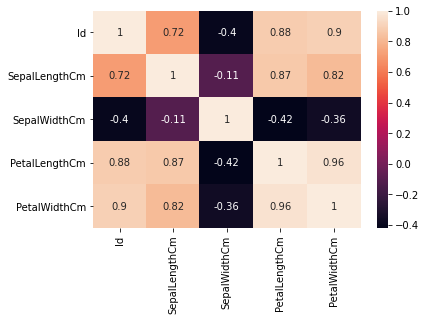

In [ ]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)

```
df.plot(kind='scatter',y='PetalWidthCm',x='PetalLengthCm')
```

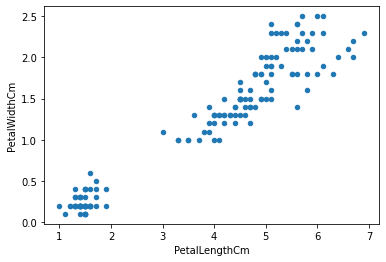

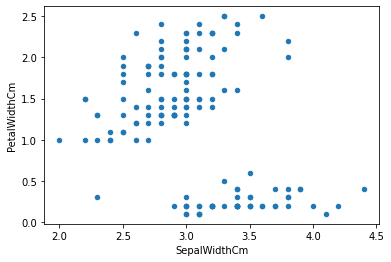

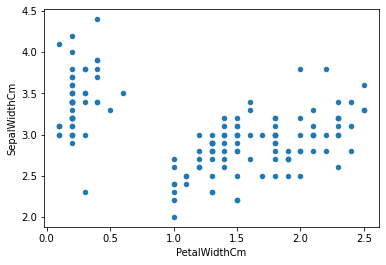

In [ ]:
df.plot(kind='scatter',y='PetalWidthCm',x='PetalLengthCm')
df.plot(kind = 'scatter', y = 'PetalWidthCm', x = 'SepalWidthCm')
df.plot(kind = 'scatter', y = 'SepalWidthCm', x = 'PetalWidthCm')

## 3. Standardize the data

```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df[['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm']])


df_scaled = pd.DataFrame(data=scaled, columns=['SepalLengthCm_scaled',
 'SepalWidthCm_scaled',
 'PetalLengthCm_scaled',
 'PetalWidthCm_scaled'])

df = df.join(df_scaled)

```

In [ ]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaled = scaler.fit_transform(df[['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm']])
 
 
df_scaled = pd.DataFrame(data=scaled, columns=['SepalLengthCm_scaled',
 'SepalWidthCm_scaled',
 'PetalLengthCm_scaled',
 'PetalWidthCm_scaled'])
 
df = df.join(df_scaled)
 

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_scaled,SepalWidthCm_scaled,PetalLengthCm_scaled,PetalWidthCm_scaled
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-0.900681,1.032057,-1.341272,-1.312977
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-1.143017,-0.124958,-1.341272,-1.312977
2,3,4.7,3.2,1.3,0.2,Iris-setosa,-1.385353,0.337848,-1.398138,-1.312977
3,4,4.6,3.1,1.5,0.2,Iris-setosa,-1.506521,0.106445,-1.284407,-1.312977
4,5,5.0,3.6,1.4,0.2,Iris-setosa,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1.038005,-0.124958,0.819624,1.447956
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0.553333,-1.281972,0.705893,0.922064
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0.795669,-0.124958,0.819624,1.053537
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.432165,0.800654,0.933356,1.447956


## 4. Run the model


```
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

X = df[['PetalLengthCm_scaled']]
y = df['PetalWidthCm']

LR.fit(X, y)

df['prediction'] = LR.predict(X)
df.head(20)
```

In [ ]:
from sklearn.linear_model import LinearRegression

#Simply makes LR a Linear Regression algorithm (no X and Y determined)
LR=LinearRegression()
 
X = df[['PetalLengthCm_scaled']]
y = df['PetalWidthCm']

#This creates the best-line-of-fit in one step (gradient descent or normalization happens internally)
#Thus, we do not see iterations where parameters are being updated (as in gradient descent)
#It plots the best line straight through the data points in one step
LR.fit(X, y)
 
df['prediction'] = LR.predict(X)
df.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_scaled,SepalWidthCm_scaled,PetalLengthCm_scaled,PetalWidthCm_scaled,prediction
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-0.900681,1.032057,-1.341272,-1.312977,0.216473
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-1.143017,-0.124958,-1.341272,-1.312977,0.216473
2,3,4.7,3.2,1.3,0.2,Iris-setosa,-1.385353,0.337848,-1.398138,-1.312977,0.174831
3,4,4.6,3.1,1.5,0.2,Iris-setosa,-1.506521,0.106445,-1.284407,-1.312977,0.258115
4,5,5.0,3.6,1.4,0.2,Iris-setosa,-1.021849,1.263460,-1.341272,-1.312977,0.216473
5,6,5.4,3.9,1.7,0.4,Iris-setosa,-0.537178,1.957669,-1.170675,-1.050031,0.341398
6,7,4.6,3.4,1.4,0.3,Iris-setosa,-1.506521,0.800654,-1.341272,-1.181504,0.216473
7,8,5.0,3.4,1.5,0.2,Iris-setosa,-1.021849,0.800654,-1.284407,-1.312977,0.258115
8,9,4.4,2.9,1.4,0.2,Iris-setosa,-1.748856,-0.356361,-1.341272,-1.312977,0.216473
9,10,4.9,3.1,1.5,0.1,Iris-setosa,-1.143017,0.106445,-1.284407,-1.444450,0.258115


## 5. Check the performance

```
from sklearn.metrics import mean_squared_error
import numpy as np

mean_squared_error(df['PetalWidthCm'],df['prediction'])

np.sqrt(mean_squared_error(df['PetalWidthCm'],df['prediction']))
```

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

#this produces the error (0.2056...)
#Since petal_width is around 2 cm, an error of + or - 2 is a huge difference
#Thus, more features are needed
np.sqrt(mean_squared_error(df['PetalWidthCm'],df['prediction']))

0.20564519522586527

## 6. See the weights and biases


```
LR.coef_
```

In [ ]:
LR.coef_

array([0.7322852])

```
LR.intercept_
```

In [ ]:
LR.intercept_

1.1986666666666665

A one standard deviation increase in Petal length results in a .732*STD(PetalWidth)increase in Petal Width. If an x value equals zero then the value of y would be 1.199. 

If we did not standardize the data, we would interpret this as a 1 cm increase in Petal Length results in a 0.73 cm increase in Petal Width. 

## 7. Repeat


```
LR=LinearRegression()
X = df[['PetalLengthCm_scaled','SepalLengthCm_scaled','SepalWidthCm_scaled']]
y = df['PetalWidthCm']

LR.fit(X, y)

df['prediction'] = LR.predict(X)
mean_squared_error(df['PetalWidthCm'],df['prediction'])
```

In [ ]:
LR=LinearRegression()
X = df[['PetalLengthCm_scaled','SepalLengthCm_scaled','SepalWidthCm_scaled']]
y = df['PetalWidthCm']
 
LR.fit(X, y)

#The error has decreased by approx 0.02 because we added more factors
df['prediction'] = LR.predict(X)
np.sqrt(mean_squared_error(df['PetalWidthCm'],df['prediction']))

0.18931748240749377

Calculate and interpret the weights and biases.

In [ ]:
LR.coef_
#an increase in sepal length, would lead to a decrease in petal width

array([ 0.92514142, -0.1735372 ,  0.09886529])

Create binary features from the Species categorical feature. Add these features as inputs into our model and check the performance.

What happens when you keep adding new features to the model?



**Warning:** So far, we are calculating our performance on the same data that we fit our model on. This means that the model is predicting observations it has already seen before, meaning it's perfectly modeling the sample but not necessarily the underlying population.

For example, if you were predicting the heights of students and it just happens to be that the day you are collecting your sample, everyone who is tall wore a red shirt, your model would improve if you add a binary red shirt feature. BUT that does not mean that red shirt is an important or informative feature. It only appears that way because of the sample of data. 

We want to AVOID having the nuances of our data sample influence our predictions. We will explore how to deal with this issue later when we explore cross-validation. For now, just take these prediction scores with a grain of salt.

### Challenge

- Create a 3 feature linear regression model to predict median home values in the Boston Housing Dataset.
- Report the performance of the model.
- Interpret the weights and biases in the model.